### Import Libraries

In [1]:
#Import Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,f1_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.backend import clear_session
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

### Import Data

In [2]:
df = pd.read_excel('Processed_data.xlsx')
df.head()

,Unnamed: 0,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484,73,nice expensive good stay anniversary arrive la...
1,1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410,205,special shot anniversary seattle suite extra w...
2,2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197,174,nice seattle good large comfortable pillowsatt...
3,3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523,80,unique great wonderful excellent short main fr...
4,4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007,155,great great seahawk awesome build huge helpful...


### Data Preparation

In [3]:
X=df['Lemmatized_Review']
y=df['Rating']

In [4]:
X.shape,y.shape

((20491,), (20491,))

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16392,), (4099,), (16392,), (4099,))

### TF - IDF Vectorization

In [7]:
tf_idf = TfidfVectorizer(ngram_range=(1,2),max_features=10000)

In [8]:
x_train_sparse = tf_idf.fit_transform(X_train)
x_train_sparse.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
x_test_sparse = tf_idf.fit_transform(X_test)
x_test_sparse.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
x_train_df = pd.DataFrame(x_train_sparse.toarray(), columns=tf_idf.get_feature_names())
x_train_df.head()

,aa,aaa,abc,absolute,absolutely,absolutely amazing,absolutely beautiful,absolutely fabulous,absolutely fantastic,absolutely gorgeous,...,youçéêl,youçéö,yr,yuck,yum,yummy,yunque,zandbergen,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
list(x_train_df.columns)

['aa',
 'aaa',
 'abc',
 'absolute',
 'absolutely',
 'absolutely amazing',
 'absolutely beautiful',
 'absolutely fabulous',
 'absolutely fantastic',
 'absolutely gorgeous',
 'absolutely love',
 'absolutely perfect',
 'absolutely recommend',
 'absolutely stay',
 'absolutely wonderful',
 'absolutly',
 'abundant',
 'ac',
 'ac room',
 'ac work',
 'accept',
 'acceptable',
 'access',
 'access hotel',
 'access internet',
 'access lobby',
 'access room',
 'accessible',
 'accident',
 'accidentally',
 'accommodate',
 'accommodation',
 'accomodate',
 'accomodated',
 'accomodating',
 'accomodation',
 'accomodations',
 'accompany',
 'account',
 'accross',
 'accurate',
 'achieve',
 'acknowledge',
 'act',
 'action',
 'active',
 'activity',
 'activity day',
 'activity kid',
 'activity staff',
 'actual',
 'adagio',
 'adam',
 'add',
 'add bonus',
 'added',
 'addition',
 'additional',
 'additional charge',
 'additionally',
 'address',
 'adequate',
 'adjacent',
 'adjoin',
 'adjoin room',
 'adjust',
 'admit

In [12]:
x_test_df = pd.DataFrame(x_test_sparse.toarray(), columns=tf_idf.get_feature_names())
x_test_df.head()

,aa,aaa,abc,absolute,absolutely,absolutely amazing,absolutely beautiful,absolutely fabulous,absolutely fantastic,absolutely gorgeous,...,youçéêl,youçéö,yr,yuck,yum,yummy,yunque,zandbergen,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_train_df.shape,x_test_df.shape

((16392, 10000), (4099, 10000))

### Model Building // Model Evaluation // Model Testing

### 1. Logistic Regression

In [109]:
logistic_model = LogisticRegression()

In [ ]:
%%time
logistic_model.fit(x_train_df,y_train)

In [ ]:
logistic_pred_train=logistic_model.predict(x_train_df)
logistic_pred_test=logistic_model.predict(x_test_df)
logistic_train_acc=accuracy_score(logistic_pred_train,y_train)
logistic_test_acc=accuracy_score(logistic_pred_test,y_test)

In [ ]:
print(logistic_train_acc)
print(logistic_test_acc)

In [17]:
lo_train=pd.DataFrame.from_dict(classification_report(logistic_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nLogistic Regression - Training Data\n')
lo_train.round(2)


Logistic Regression - Training Data



,1,2,3,4,5,weighted avg
precision,0.84,0.71,0.50,0.74,0.92,0.82
recall,0.91,0.84,0.84,0.73,0.81,0.80
f1-score,0.87,0.77,0.63,0.74,0.86,0.80
support,1046.00,1212.00,1047.00,4880.00,8207.00,16392.00


In [18]:
lo_test=pd.DataFrame.from_dict(classification_report(logistic_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nLogistic Regression - Testing Data\n')
lo_test.round(2)


Logistic Regression - Testing Data



,1,2,3,4,5,weighted avg
precision,0.01,0.01,0.01,0.12,0.86,0.75
recall,0.07,0.13,0.22,0.28,0.44,0.42
f1-score,0.02,0.02,0.02,0.16,0.59,0.52
support,44.00,31.00,18.00,491.00,3515.00,4099.00


In [ ]:
lo_f1_tr=f1_score(logistic_pred_train,y_train,average='weighted').round(2)
lo_f1_tr

In [ ]:
lo_f1_t=f1_score(logistic_pred_test,y_test,average='weighted').round(2)
lo_f1_t

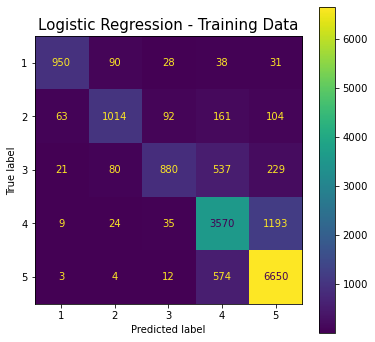

In [21]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=logistic_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Logistic Regression - Training Data',size=15)
plt.show()

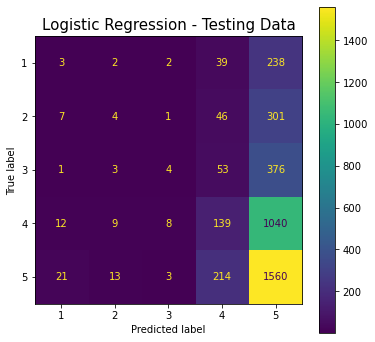

In [22]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=logistic_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Logistic Regression - Testing Data',size=15)
plt.show()

### GridSearchCV - Logistic Model

In [19]:
# C=[0.1,0.5,1,2,3,5]
# penalty=['l1','l2']
# params=dict(C=C,penalty=penalty)

In [20]:
# %%time
# cv=GridSearchCV(estimator=logistic_model,param_grid=params)
# cv.fit(x_train_df,y_train)

In [21]:
# cv.best_params_

### 2. Decision Tree Algorithm

In [24]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=3)

In [25]:
%%time
dt_model.fit(x_train_df,y_train)

Wall time: 34.5 s


DecisionTreeClassifier(max_depth=9, min_samples_leaf=3)

In [26]:
dt_pred_train=dt_model.predict(x_train_df)
dt_pred_test=dt_model.predict(x_test_df)
dt_train_acc=accuracy_score(dt_pred_train,y_train)
dt_test_acc=accuracy_score(dt_pred_test,y_test)

In [24]:
dt_train=pd.DataFrame.from_dict(classification_report(dt_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nDecision Tree - Training Data\n')
dt_train.round(2)


Decision Tree - Training Data



,1,2,3,4,5,weighted avg
precision,0.25,0.16,0.06,0.55,0.81,0.69
recall,0.78,0.52,0.68,0.49,0.58,0.56
f1-score,0.38,0.24,0.10,0.52,0.68,0.60
support,362.00,431.00,143.00,5365.00,10091.00,16392.00


In [25]:
dt_test=pd.DataFrame.from_dict(classification_report(dt_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nDecision Tree - Testing Data\n')
dt_test.round(2)


Decision Tree - Testing Data



,1,2,3,4,5,weighted avg
precision,0.03,0.0,0.0,0.0,0.94,0.90
recall,0.04,0.0,0.0,0.2,0.44,0.42
f1-score,0.03,0.0,0.0,0.0,0.60,0.57
support,183.00,2.0,0.0,5.0,3909.00,4099.00


In [27]:
dt_f1_tr=f1_score(dt_pred_train,y_train,average='weighted').round(2)
dt_f1_tr

0.6

In [28]:
dt_f1_t=f1_score(dt_pred_test,y_test,average='weighted').round(2)
dt_f1_t

0.57

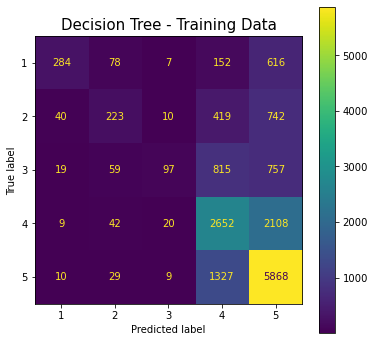

In [26]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=dt_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Decision Tree - Training Data',size=15)
plt.show()

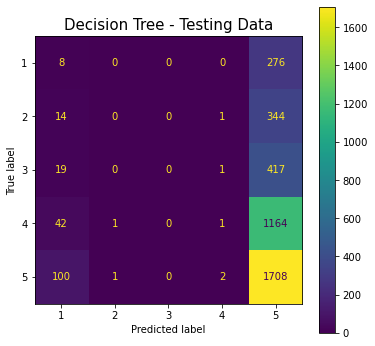

In [27]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=dt_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Decision Tree - Testing Data',size=15)
plt.show()

### GridSearchCV - DT Classifier Model

In [28]:
# criterion = ['gini','entropy']
# max_depth = [3,5,7,9,11]
# min_samples_leaf = [1,3,5,7,9]
# params=dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf)

In [29]:
# %%time
# cv=GridSearchCV(estimator=dt_model,param_grid=params)
# cv.fit(x_train_df,y_train)

In [30]:
# cv.best_params_

### 3. K- Nearest Neighbors Algorithm (KNN)

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=35)

In [30]:
%%time
knn_model.fit(x_train_df,y_train)

Wall time: 329 ms


KNeighborsClassifier(n_neighbors=35)

In [31]:
knn_pred_train=knn_model.predict(x_train_df)
knn_pred_test=knn_model.predict(x_test_df)
knn_train_acc=accuracy_score(knn_pred_train,y_train)
knn_test_acc=accuracy_score(knn_pred_test,y_test)

In [36]:
knn_train=pd.DataFrame.from_dict(classification_report(knn_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nKNN - Training Data\n')
knn_train.round(2)


KNN - Training Data



,1,2,3,4,5,weighted avg
precision,0.46,0.16,0.06,0.44,0.86,0.69
recall,0.67,0.46,0.46,0.47,0.61,0.56
f1-score,0.54,0.23,0.10,0.45,0.71,0.61
support,774.00,486.00,219.00,4591.00,10322.00,16392.00


In [37]:
knn_test=pd.DataFrame.from_dict(classification_report(knn_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nKNN - Testing Data\n')
knn_test.round(2)


KNN - Testing Data



,1,2,3,4,5,weighted avg
precision,0.01,0.01,0.00,0.14,0.85,0.74
recall,0.09,0.12,0.11,0.31,0.45,0.42
f1-score,0.02,0.02,0.01,0.19,0.58,0.52
support,46.00,25.00,18.00,549.00,3461.00,4099.00


In [32]:
knn_f1_tr=f1_score(knn_pred_train,y_train,average='weighted').round(2)
knn_f1_tr

0.61

In [33]:
knn_f1_t=f1_score(knn_pred_test,y_test,average='weighted').round(2)
knn_f1_t

0.52

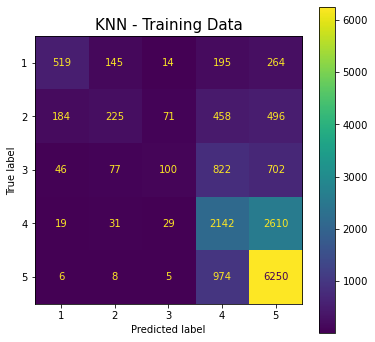

In [38]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=knn_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('KNNdt_f1_tr=f1_score(dt_pred_train,y_train,average='weighted').round(2)
plt.show()

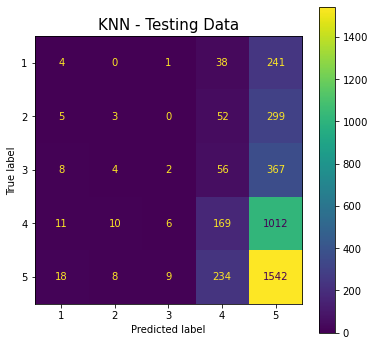

In [39]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=knn_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('KNN - Testing Data',size=15)
plt.show()

### GridSearchCV - KNN Classifier Model

In [40]:
# test=[]
# neighbours = list(range(1,50,2))
# for i in neighbours:
#     knn=KNeighborsClassifier(n_neighbors=i)
#     score=cross_val_score(estimator=knn,X=x_train_df,y=y_train,cv=10)
#     mean_score=np.round(np.mean(score),4)
#     test.append(mean_score)

In [41]:
#Optmum Number of Neighbours
# neighbours[test.index(np.max(test))]

In [42]:
# plt.plot(neighbours,test)
# plt.xticks(np.arange(1, 50, step=2))
# plt.show()

### 4. Random Forest Classifier

In [34]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=9)

In [35]:
%%time
rf_model.fit(x_train_df,y_train)

Wall time: 26.2 s


RandomForestClassifier(max_depth=9)

In [36]:
rf_pred_train=rf_model.predict(x_train_df)
rf_pred_test=rf_model.predict(x_test_df)
rf_train_acc=accuracy_score(rf_pred_train,y_train)
rf_test_acc=accuracy_score(rf_pred_test,y_test)

In [46]:
rf_train=pd.DataFrame.from_dict(classification_report(rf_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nRandom Forest - Training Data\n')
rf_train.round(2)


Random Forest - Training Data



,1,2,3,4,5,weighted avg
precision,0.04,0.0,0.0,0.02,1.00,0.99
recall,0.98,1.0,0.0,0.84,0.45,0.45
f1-score,0.07,0.0,0.0,0.03,0.62,0.61
support,45.00,2.0,0.0,100.00,16245.00,16392.00


In [47]:
rf_test=pd.DataFrame.from_dict(classification_report(rf_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nRandom Forest - Testing Data\n')
rf_test.round(2)


Random Forest - Testing Data



,1,2,3,4,5,weighted avg
precision,0.0,0.0,0.0,0.0,1.00,1.00
recall,0.0,0.0,0.0,0.0,0.44,0.44
f1-score,0.0,0.0,0.0,0.0,0.61,0.61
support,0.0,0.0,0.0,0.0,4099.00,4099.00


In [37]:
rf_f1_tr=f1_score(rf_pred_train,y_train,average='weighted').round(2)
rf_f1_tr

0.61

In [38]:
rf_f1_t=f1_score(rf_pred_test,y_test,average='weighted').round(2)
rf_f1_t

0.61

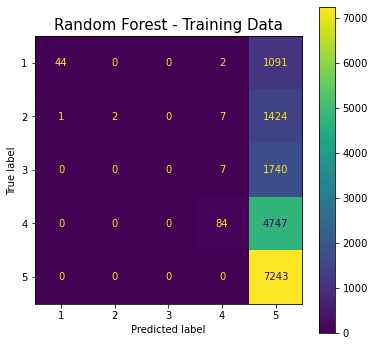

In [48]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=rf_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Random Forest - Training Data',size=15)
plt.show()

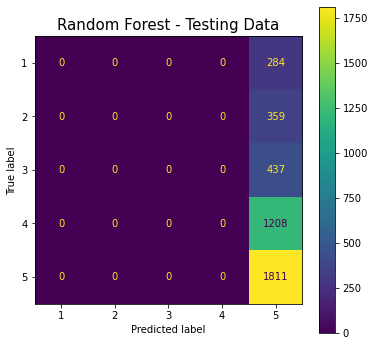

In [49]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=rf_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Random Forest - Testing Data',size=15)
plt.show()

### 5. ADABOOST Classifier

In [39]:
ada_model = AdaBoostClassifier()

In [40]:
%%time
ada_model.fit(x_train_df,y_train)

Wall time: 4min 28s


AdaBoostClassifier()

In [41]:
ada_pred_train=ada_model.predict(x_train_df)
ada_pred_test=ada_model.predict(x_test_df)
ada_train_acc=accuracy_score(ada_pred_train,y_train)
ada_test_acc=accuracy_score(ada_pred_test,y_test)

In [53]:
ada_train=pd.DataFrame.from_dict(classification_report(ada_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nAda Boost - Training Data\n')
ada_train.round(2)


Ada Boost - Training Data



,1,2,3,4,5,weighted avg
precision,0.59,0.31,0.12,0.45,0.77,0.60
recall,0.59,0.36,0.37,0.45,0.64,0.55
f1-score,0.59,0.33,0.19,0.45,0.70,0.57
support,1127.00,1221.00,580.00,4734.00,8730.00,16392.00


In [54]:
ada_test=pd.DataFrame.from_dict(classification_report(ada_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nAda Boost - Testing Data\n')
ada_test.round(2)


Ada Boost - Testing Data



,1,2,3,4,5,weighted avg
precision,0.07,0.01,0.00,0.00,0.89,0.80
recall,0.06,0.03,0.06,0.33,0.44,0.40
f1-score,0.06,0.01,0.00,0.00,0.59,0.53
support,342.00,75.00,16.00,6.00,3660.00,4099.00


In [42]:
ada_f1_tr=f1_score(ada_pred_train,y_train,average='weighted').round(2)
ada_f1_tr

0.57

In [43]:
ada_f1_t=f1_score(ada_pred_test,y_test,average='weighted').round(2)
ada_f1_t

0.53

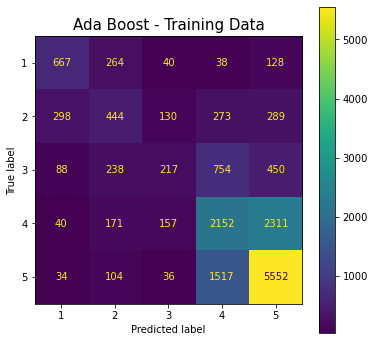

In [55]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=ada_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Ada Boost - Training Data',size=15)
plt.show()

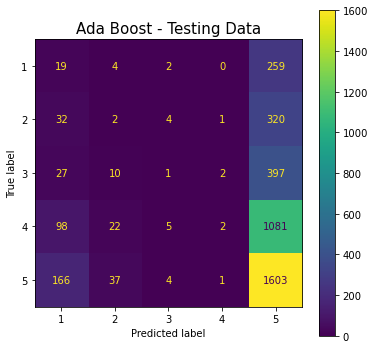

In [56]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=ada_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Ada Boost - Testing Data',size=15)
plt.show()

### 6. Support Vector Machines

In [67]:
svm_model = SVC()

In [68]:
%%time
svm_model.fit(x_train_df,y_train)

Wall time: 40min 47s


SVC()

In [69]:
svm_pred_train=svm_model.predict(x_train_df)
svm_pred_test=svm_model.predict(x_test_df)
svm_train_acc=accuracy_score(svm_pred_train,y_train)
svm_test_acc=accuracy_score(svm_pred_test,y_test)

In [63]:
svm_train=pd.DataFrame.from_dict(classification_report(svm_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nSVM - Training Data\n')
svm_train.round(2)


SVM - Training Data



,1,2,3,4,5,weighted avg
precision,0.99,0.96,0.90,0.94,0.99,0.96
recall,0.99,0.98,0.99,0.95,0.95,0.96
f1-score,0.99,0.97,0.94,0.94,0.97,0.96
support,1133.00,1404.00,1579.00,4781.00,7495.00,16392.00


In [64]:
svm_test=pd.DataFrame.from_dict(classification_report(svm_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nSVM - Testing Data\n')
svm_test.round(2)


SVM - Testing Data



,1,2,3,4,5,weighted avg
precision,0.0,0.01,0.00,0.09,0.92,0.84
recall,0.0,0.09,0.25,0.32,0.45,0.43
f1-score,0.0,0.02,0.00,0.14,0.60,0.56
support,20.0,35.00,4.00,331.00,3709.00,4099.00


In [70]:
svm_f1_tr=f1_score(svm_pred_train,y_train,average='weighted').round(2)
svm_f1_tr

0.96

In [71]:
svm_f1_t=f1_score(svm_pred_test,y_test,average='weighted').round(2)
svm_f1_t

0.56

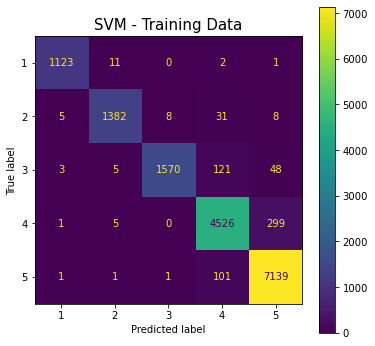

In [73]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=svm_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('SVM - Training Data',size=15)
plt.show()

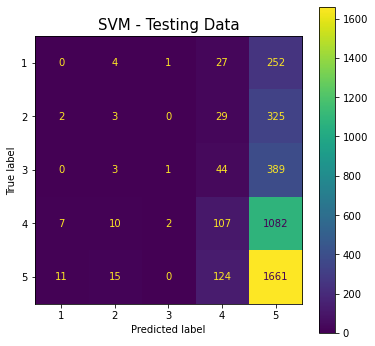

In [74]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=svm_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('SVM - Testing Data',size=15)
plt.show()

### 7. Naive Bayes

In [44]:
nb_model = MultinomialNB()

In [45]:
%%time
nb_model.fit(x_train_df,y_train)

Wall time: 611 ms


MultinomialNB()

In [46]:
nb_pred_train=nb_model.predict(x_train_df)
nb_pred_test=nb_model.predict(x_test_df)
nb_train_acc=accuracy_score(nb_pred_train,y_train)
nb_test_acc=accuracy_score(nb_pred_test,y_test)

In [69]:
nb_train=pd.DataFrame.from_dict(classification_report(nb_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNaive Bayes - Training Data\n')
nb_train.round(2)


Naive Bayes - Training Data



,1,2,3,4,5,weighted avg
precision,0.55,0.33,0.03,0.54,0.92,0.76
recall,0.94,0.70,0.82,0.50,0.68,0.63
f1-score,0.69,0.44,0.06,0.52,0.78,0.68
support,663.00,670.00,68.00,5187.00,9804.00,16392.00


In [70]:
nb_test=pd.DataFrame.from_dict(classification_report(nb_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNaive Bayes - Testing Data\n')
nb_test.round(2)


Naive Bayes - Testing Data



,1,2,3,4,5,weighted avg
precision,0.33,0.19,0.23,0.07,0.37,0.28
recall,0.10,0.09,0.13,0.26,0.55,0.25
f1-score,0.15,0.12,0.16,0.11,0.44,0.23
support,985.00,787.00,798.00,302.00,1227.00,4099.00


In [47]:
nb_f1_tr=f1_score(nb_pred_train,y_train,average='weighted').round(2)
nb_f1_tr

0.68

In [48]:
nb_f1_t=f1_score(nb_pred_test,y_test,average='weighted').round(2)
nb_f1_t

0.23

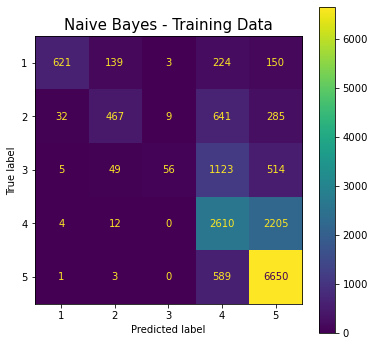

In [71]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=nb_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Naive Bayes - Training Data',size=15)
plt.show()

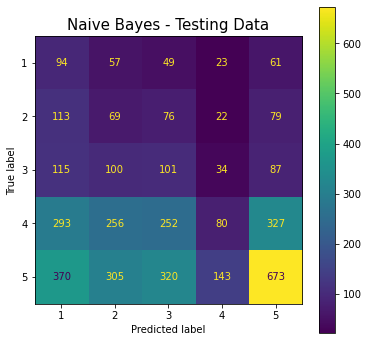

In [72]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=nb_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Naive Bayes - Testing Data',size=15)
plt.show()

### 8. Stacking Model

In [49]:
stack_model = StackingClassifier(estimators=[('Decision Tree',dt_model),('KNN',knn_model),('Random Forest',rf_model),
                                            ('Ada Boost',ada_model),('Naive Bayes',nb_model)],
                                 final_estimator=logistic_model,stack_method='predict_proba')

In [50]:
%%time
stack_model.fit(x_train_df,y_train)

Wall time: 29min 46s


StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=9,
                                                       min_samples_leaf=3)),
                               ('KNN', KNeighborsClassifier(n_neighbors=35)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=9)),
                               ('Ada Boost', AdaBoostClassifier()),
                               ('Naive Bayes', MultinomialNB())],
                   final_estimator=LogisticRegression(C=1),
                   stack_method='predict_proba')

In [51]:
stack_pred_train=stack_model.predict(x_train_df)
stack_pred_test=stack_model.predict(x_test_df)
stack_train_acc=accuracy_score(stack_pred_train,y_train)
stack_test_acc=accuracy_score(stack_pred_test,y_test)

In [78]:
stack_train=pd.DataFrame.from_dict(classification_report(stack_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nStacking - Training Data\n')
stack_train.round(2)


Stacking - Training Data



,1,2,3,4,5,weighted avg
precision,0.78,0.53,0.36,0.63,0.86,0.72
recall,0.74,0.53,0.56,0.64,0.79,0.70
f1-score,0.76,0.53,0.44,0.63,0.82,0.71
support,1195.00,1441.00,1123.00,4746.00,7887.00,16392.00


In [79]:
stack_test=pd.DataFrame.from_dict(classification_report(stack_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nStacking - Testing Data\n')
stack_test.round(2)


Stacking - Testing Data



,1,2,3,4,5,weighted avg
precision,0.75,0.28,0.01,0.02,0.05,0.57
recall,0.08,0.08,0.20,0.40,0.65,0.11
f1-score,0.14,0.13,0.01,0.04,0.09,0.14
support,2670.00,1211.00,15.00,63.00,140.00,4099.00


In [52]:
stack_f1_tr=f1_score(stack_pred_train,y_train,average='weighted').round(2)
stack_f1_tr

0.71

In [53]:
stack_f1_t=f1_score(stack_pred_test,y_test,average='weighted').round(2)
stack_f1_t

0.14

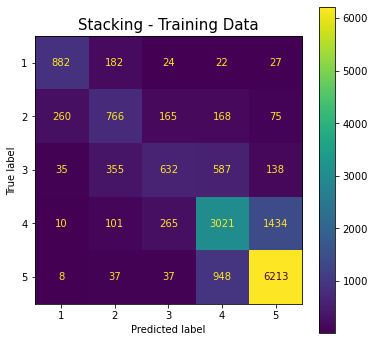

In [80]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=stack_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Stacking - Training Data',size=15)
plt.show()

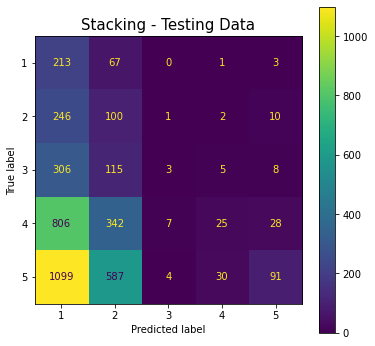

In [81]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=stack_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Stacking - Testing Data',size=15)
plt.show()

### 9. Convolution Neural Network

In [72]:
input_dim = x_train_df.shape[1]
input_dim

10000

In [73]:
y_train_encoded=pd.get_dummies(y_train).to_numpy()
y_test_encoded=pd.get_dummies(y_test).to_numpy()

In [74]:
y_train_encoded

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [75]:
model1=Sequential()
model1.add(Dense(units=64,input_dim=input_dim,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=5,activation='softmax'))
adam=Adam(learning_rate=0.01)

In [76]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 642,309
Trainable params: 642,309
Non-trainable params: 0
_________________________________________________________________


In [77]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

In [78]:
#clear_session()
model_history1=model1.fit(x_train_df,y_train_encoded,validation_split=0.3,batch_size=75,epochs=100,verbose=2)

Epoch 1/100
153/153 - 2s - loss: 0.9770 - accuracy: 0.5695 - val_loss: 0.8692 - val_accuracy: 0.6149 - 2s/epoch - 15ms/step
Epoch 2/100
153/153 - 2s - loss: 0.5618 - accuracy: 0.7700 - val_loss: 1.0134 - val_accuracy: 0.5750 - 2s/epoch - 10ms/step
Epoch 3/100
153/153 - 1s - loss: 0.2230 - accuracy: 0.9162 - val_loss: 1.5852 - val_accuracy: 0.5880 - 1s/epoch - 10ms/step
Epoch 4/100
153/153 - 2s - loss: 0.0695 - accuracy: 0.9761 - val_loss: 2.0764 - val_accuracy: 0.5712 - 2s/epoch - 12ms/step
Epoch 5/100
153/153 - 1s - loss: 0.0169 - accuracy: 0.9954 - val_loss: 2.6984 - val_accuracy: 0.5750 - 1s/epoch - 9ms/step
Epoch 6/100
153/153 - 1s - loss: 0.0058 - accuracy: 0.9987 - val_loss: 2.9945 - val_accuracy: 0.5734 - 1s/epoch - 9ms/step
Epoch 7/100
153/153 - 2s - loss: 0.0020 - accuracy: 0.9997 - val_loss: 3.2439 - val_accuracy: 0.5695 - 2s/epoch - 10ms/step
Epoch 8/100
153/153 - 1s - loss: 3.8481e-04 - accuracy: 1.0000 - val_loss: 3.3788 - val_accuracy: 0.5685 - 1s/epoch - 9ms/step
Epoch 9

In [79]:
model_history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [80]:
y_test_encoded

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [81]:
y_pred_test=model1.predict(x_test_df)
y_pred_test

129/129 [==============================] - 0s 3ms/step


array([[6.8707622e-19, 5.1512648e-12, 1.3965817e-21, 1.8598390e-05,
        9.9998140e-01],
       [4.4888884e-13, 3.3473391e-12, 1.4825555e-17, 1.7304994e-12,
        1.0000000e+00],
       [2.3509009e-20, 3.6218465e-14, 2.2055597e-15, 1.1141763e-09,
        1.0000000e+00],
       ...,
       [1.0902058e-19, 1.1487629e-18, 1.3169336e-24, 3.5007455e-14,
        1.0000000e+00],
       [7.4766504e-08, 4.1824552e-01, 1.1072817e-06, 9.0932481e-02,
        4.9082088e-01],
       [1.7914631e-26, 6.9731563e-19, 4.3396372e-26, 4.6923821e-15,
        1.0000000e+00]], dtype=float32)

In [82]:
y_train_encoded

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [83]:
y_pred_train=model1.predict(x_train_df)
y_pred_train

513/513 [==============================] - 1s 3ms/step


array([[3.3748872e-30, 1.1063127e-22, 3.0815613e-27, 9.3346836e-17,
        1.0000000e+00],
       [3.1406012e-20, 1.5468747e-09, 1.7075213e-13, 1.0000000e+00,
        5.4470100e-18],
       [1.4789946e-20, 1.7953983e-17, 3.2921725e-22, 5.0574383e-13,
        1.0000000e+00],
       ...,
       [5.0027481e-08, 5.1116096e-03, 9.9462092e-01, 2.6744403e-04,
        2.6236147e-10],
       [9.0248468e-13, 2.3619576e-10, 9.9999881e-01, 1.1670260e-06,
        9.5617436e-10],
       [9.7936999e-15, 1.7228023e-11, 9.9998581e-01, 2.5857705e-10,
        1.4225497e-05]], dtype=float32)

In [84]:
y_tr=np.argmax(y_train_encoded, axis=1)+1
y_pred_tr=np.argmax(y_pred_train, axis=1)+1
y_t=np.argmax(y_test_encoded, axis=1)+1
y_pred_t=np.argmax(y_pred_test, axis=1)+1

In [85]:
train_predictions=pd.DataFrame()
train_predictions['Actual']=pd.Series(y_tr)
train_predictions['Test_Probability']=pd.Series(y_pred_tr)
train_predictions['Prediction']=train_predictions['Actual']-train_predictions['Test_Probability']
train_predictions['Validation']=train_predictions['Prediction'].apply(lambda x: True if x==0 else False)
train_predictions

,Actual,Test_Probability,Prediction,Validation
0,5,5,0,True
1,4,4,0,True
2,5,5,0,True
3,5,5,0,True
4,2,2,0,True
...,...,...,...,...
16387,4,5,-1,False
16388,4,4,0,True
16389,2,3,-1,False
16390,3,3,0,True


In [86]:
train_predictions['Validation'].value_counts()

True     14234
False     2158
Name: Validation, dtype: int64

In [87]:
cnn_train=pd.DataFrame.from_dict(classification_report(train_predictions['Test_Probability'],train_predictions['Actual'],output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNeural Network - Training Data\n')
cnn_train.round(2)


Neural Network - Training Data



,1,2,3,4,5,weighted avg
precision,0.87,0.80,0.81,0.84,0.91,0.87
recall,0.88,0.83,0.79,0.84,0.91,0.87
f1-score,0.87,0.81,0.80,0.84,0.91,0.87
support,1131.00,1389.00,1799.00,4819.00,7254.00,16392.00


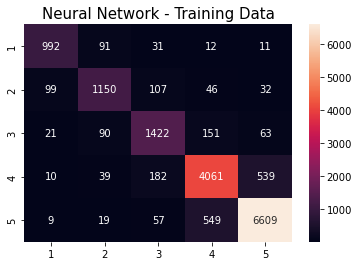

In [88]:
sns.heatmap(confusion_matrix(train_predictions['Actual'],train_predictions['Test_Probability']),annot=True,fmt='.0f',
            xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])
plt.title('Neural Network - Training Data',size=15)
plt.show()

In [89]:
cnn_train_acc=accuracy_score(train_predictions['Test_Probability'],train_predictions['Actual'])
cnn_train_acc.round(3)

0.868

In [90]:
test_predictions=pd.DataFrame()
test_predictions['Actual']=pd.Series(y_t)
test_predictions['Test_Probability']=pd.Series(y_pred_t)
test_predictions['Prediction']=test_predictions['Actual']-test_predictions['Test_Probability']
test_predictions['Validation']=test_predictions['Prediction'].apply(lambda x: True if x==0 else False)


In [91]:
test_predictions['Validation'].value_counts()

False    2476
True     1623
Name: Validation, dtype: int64

In [92]:
cnn_test=pd.DataFrame.from_dict(classification_report(test_predictions['Test_Probability'],test_predictions['Actual'],output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNeural Network - Testing Data\n')
cnn_test.round(2)


Neural Network - Testing Data



,1,2,3,4,5,weighted avg
precision,0.03,0.03,0.03,0.15,0.78,0.63
recall,0.18,0.13,0.15,0.27,0.44,0.40
f1-score,0.05,0.05,0.05,0.20,0.56,0.47
support,44.00,86.00,89.00,687.00,3193.00,4099.00


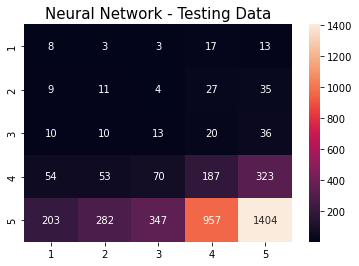

In [93]:
sns.heatmap(confusion_matrix(test_predictions['Test_Probability'],test_predictions['Actual']),annot=True,fmt='.0f',
            xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])
plt.title('Neural Network - Testing Data',size=15)
plt.show()

In [94]:
cnn_test_acc=accuracy_score(test_predictions['Test_Probability'],test_predictions['Actual'])
cnn_test_acc.round(3)

0.396

In [95]:
cnn_f1_tr=f1_score(train_predictions['Test_Probability'],train_predictions['Actual'],average='weighted').round(2)
cnn_f1_tr

0.87

In [96]:
cnn_f1_t=f1_score(test_predictions['Test_Probability'],test_predictions['Actual'],average='weighted').round(2)
cnn_f1_t

0.47

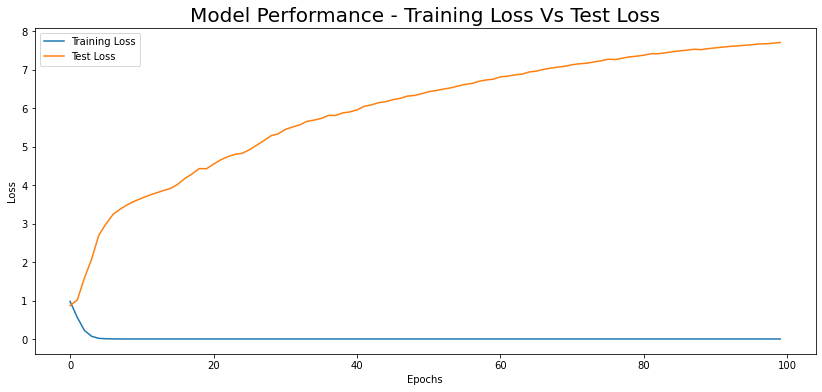

In [97]:
plt.figure(figsize=(14,6))
plt.plot(model_history1.history['loss'],label = 'Training Loss')
plt.plot(model_history1.history['val_loss'],label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.legend()
plt.show()

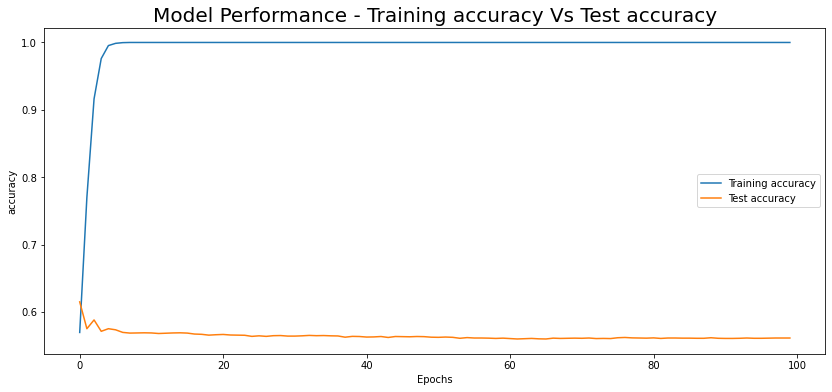

In [98]:
plt.figure(figsize=(14,6))
plt.plot(model_history1.history['accuracy'],label = 'Training accuracy')
plt.plot(model_history1.history['val_accuracy'],label = 'Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Model Performance - Training accuracy Vs Test accuracy',size = 20)
plt.legend()
plt.show()

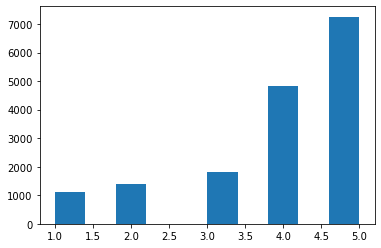

In [99]:
plt.hist(train_predictions['Test_Probability'])
plt.show()

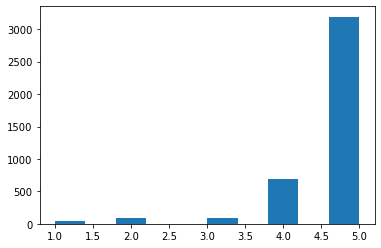

In [100]:
plt.hist(test_predictions['Test_Probability'])
plt.show()

In [101]:
# def base_model():
#     model=Sequential()
#     model.add(Dense(units=64,input_dim=input_dim,activation='relu'))
#     model.add(Dense(units=32,activation='relu'))
#     model.add(Dense(units=5,activation='softmax'))
#     adam=Adam(learning_rate=0.01)
#     model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)
#     return model

In [102]:
# estimator = KerasClassifier(build_fn=base_model,verbose=1)
# batch_size = [50,75,100,200]
# epochs = [25,50,100,200]
# param_grid = dict(batch_size=batch_size,epochs=epochs)
# grid=GridSearchCV(estimator=estimator,param_grid=param_grid,cv=KFold())

In [103]:
# x_train_df.shape

In [104]:
#clear_session()
# grid_results=grid.fit(x_train_df,y_train_encoded,verbose=2)

In [105]:
# grid_results.best_score_

In [106]:
# grid_results.best_params_

### 10. Xtreme Boosting

In [54]:
xgb_model=XGBClassifier(n_estimators=100)

In [55]:
le=LabelEncoder()
le_y_train=le.fit_transform(y_train)
le_y_test=le.fit_transform(y_test)

In [56]:
%%time
xgb_model.fit(x_train_df,le_y_train)

Wall time: 14min 41s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [57]:
xgb_pred_train=xgb_model.predict(x_train_df)
xgb_pred_test=xgb_model.predict(x_test_df)
xgb_train_acc=accuracy_score(xgb_pred_train,le_y_train)
xgb_test_acc=accuracy_score(xgb_pred_test,le_y_test)

In [58]:
print(xgb_train_acc)
print(xgb_test_acc)

0.9130063445583211
0.3176384484020493


In [22]:
xgb_train=pd.DataFrame.from_dict(classification_report(xgb_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNaive Bayes - Training Data\n')
xgb_train.round(2)


Naive Bayes - Training Data



,1,2,3,4,5,weighted avg
precision,0.95,0.83,0.78,0.64,0.75,0.80
recall,0.89,0.75,0.80,0.72,0.79,0.79
f1-score,0.92,0.79,0.79,0.68,0.77,0.79
support,7749.00,8030.00,7102.00,6460.00,6874.00,36215.00


In [23]:
xgb_test=pd.DataFrame.from_dict(classification_report(xgb_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNaive Bayes - Testing Data\n')
xgb_test.round(2)


Naive Bayes - Testing Data



,1,2,3,4,5,weighted avg
precision,0.02,0.10,0.10,0.24,0.70,0.51
recall,0.12,0.16,0.15,0.32,0.48,0.40
f1-score,0.03,0.12,0.12,0.28,0.57,0.44
support,42.00,225.00,296.00,907.00,2629.00,4099.00


In [59]:
xgb_f1_tr=f1_score(xgb_pred_train,le_y_train,average='weighted').round(2)
xgb_f1_tr

0.91

In [60]:
xgb_f1_t=f1_score(xgb_pred_test,le_y_test,average='weighted').round(2)
xgb_f1_t

0.37

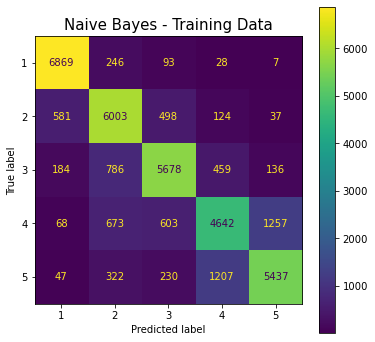

In [26]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=xgb_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('XGB - Training Data',size=15)
plt.show()

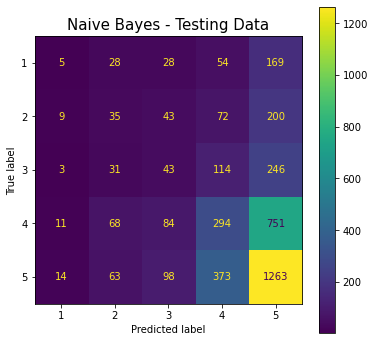

In [27]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=xgb_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('XGB - Testing Data',size=15)
plt.show()

### 11. Light Gradient Boosting

In [61]:
lgbm_model=LGBMClassifier(n_estimators=100)

In [62]:
%%time
lgbm_model.fit(x_train_df,y_train)

Wall time: 1min 2s


LGBMClassifier()

In [63]:
lgbm_pred_train=lgbm_model.predict(x_train_df)
lgbm_pred_test=lgbm_model.predict(x_test_df)
lgbm_train_acc=accuracy_score(lgbm_pred_train,y_train)
lgbm_test_acc=accuracy_score(lgbm_pred_test,y_test)

In [64]:
print(lgbm_train_acc)
print(lgbm_test_acc)

0.9125793069790141
0.3198341058794828


In [22]:
lgbm_train=pd.DataFrame.from_dict(classification_report(lgbm_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNaive Bayes - Training Data\n')
lgbm_train.round(2)


Naive Bayes - Training Data



,1,2,3,4,5,weighted avg
precision,0.95,0.83,0.78,0.64,0.75,0.80
recall,0.89,0.75,0.80,0.72,0.79,0.79
f1-score,0.92,0.79,0.79,0.68,0.77,0.79
support,7749.00,8030.00,7102.00,6460.00,6874.00,36215.00


In [23]:
lgbm_test=pd.DataFrame.from_dict(classification_report(lgbm_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nNaive Bayes - Testing Data\n')
lgbm_test.round(2)


Naive Bayes - Testing Data



,1,2,3,4,5,weighted avg
precision,0.02,0.10,0.10,0.24,0.70,0.51
recall,0.12,0.16,0.15,0.32,0.48,0.40
f1-score,0.03,0.12,0.12,0.28,0.57,0.44
support,42.00,225.00,296.00,907.00,2629.00,4099.00


In [65]:
lgbm_f1_tr=f1_score(lgbm_pred_train,y_train,average='weighted').round(2)
lgbm_f1_tr

0.91

In [66]:
lgbm_f1_t=f1_score(lgbm_pred_test,y_test,average='weighted').round(2)
lgbm_f1_t

0.35

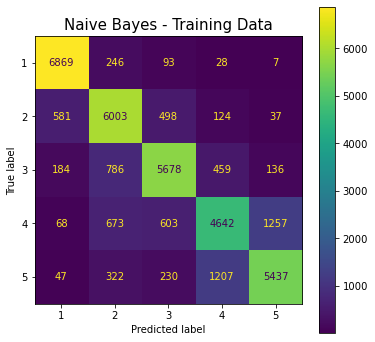

In [26]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=lgbm_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('LGBM - Training Data',size=15)
plt.show()

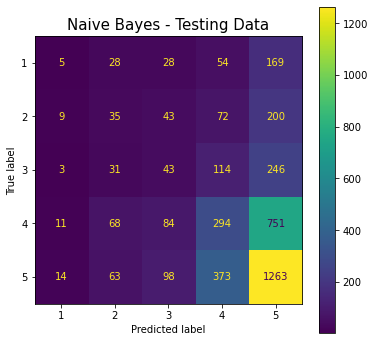

In [27]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=nb_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('LGBM - Testing Data',size=15)
plt.show()

### Model Evaluation

In [107]:
df_Model_analysis = pd.DataFrame(columns=['Training Accuracy','Testing Accuracy','Accuracy Difference'])
df_Model_analysis['Model Name'] = pd.Series(['Logistic Regression','Decision Tree','KNN','Random Forest','Ada Boost',
                                             'SVM','Naive Bayes','Stacking','Neural Network','XG Boost', 'LG Boost'])
df_Model_analysis['Training Accuracy'] = pd.Series([logistic_train_acc,dt_train_acc,knn_train_acc,rf_train_acc,ada_train_acc,
                                         svm_train_acc,nb_train_acc,stack_train_acc,cnn_train_acc,xgb_train_acc,lgbm_train_acc])
df_Model_analysis['Testing Accuracy'] = pd.Series([logistic_test_acc,dt_test_acc,knn_test_acc,rf_test_acc,ada_test_acc,
                                         svm_test_acc,nb_test_acc,stack_test_acc,cnn_test_acc,xgb_test_acc,lgbm_test_acc])
df_Model_analysis['Accuracy Difference'] = df_Model_analysis['Training Accuracy'] - df_Model_analysis['Testing Accuracy']
df_Model_analysis=df_Model_analysis.set_index('Model Name')
df_Model_analysis=df_Model_analysis.sort_values(by=['Training Accuracy','Testing Accuracy'],ascending = [True, True])
print('\033[1m'+'\nAccuracy Analysis - 10000 Features\n')
df_Model_analysis.round(3)


Accuracy Analysis - 10000 Features



,Training Accuracy,Testing Accuracy,Accuracy Difference
Model Name,,,
Random Forest,0.448,0.442,0.006
Ada Boost,0.551,0.397,0.154
Decision Tree,0.557,0.419,0.138
KNN,0.563,0.420,0.144
Naive Bayes,0.635,0.248,0.387
Stacking,0.705,0.105,0.599
Logistic Regression,0.797,0.417,0.380
Neural Network,0.868,0.396,0.472
LG Boost,0.913,0.320,0.593


In [108]:
df_f1_analysis = pd.DataFrame(columns=['Training F1 Score','Testing F1 Score','F1 Score Difference'])
df_f1_analysis['Model Name'] = pd.Series(['Logistic Regression','Decision Tree','KNN','Random Forest','Ada Boost',
                                             'SVM','Naive Bayes','Stacking','Neural Network','XG Boost', 'LG Boost'])
df_f1_analysis['Training F1 Score'] = pd.Series([lo_f1_tr,dt_f1_tr,knn_f1_tr,rf_f1_tr,ada_f1_tr,
                                                    svm_f1_tr,nb_f1_tr,stack_f1_tr,cnn_f1_tr,xgb_f1_tr,lgbm_f1_tr])
df_f1_analysis['Testing F1 Score'] = pd.Series([lo_f1_t,dt_f1_t,knn_f1_t,rf_f1_t,ada_f1_t,
                                                    svm_f1_t,nb_f1_t,stack_f1_t,cnn_f1_t,xgb_f1_t,lgbm_f1_t])
df_f1_analysis['F1 Score Difference'] = df_f1_analysis['Training F1 Score'] - df_f1_analysis['Testing F1 Score']
df_f1_analysis=df_f1_analysis.set_index('Model Name')
df_f1_analysis=df_f1_analysis.sort_values(by=['Training F1 Score','Testing F1 Score'],ascending = [True, True])
print('\033[1m'+'\nF1 Score Analysis - 10000 Features\n')
df_f1_analysis.round(3)


F1 Score Analysis - 10000 Features



,Training F1 Score,Testing F1 Score,F1 Score Difference
Model Name,,,
Ada Boost,0.57,0.53,0.04
Decision Tree,0.60,0.57,0.03
KNN,0.61,0.52,0.09
Random Forest,0.61,0.61,0.00
Naive Bayes,0.68,0.23,0.45
Stacking,0.71,0.14,0.57
Logistic Regression,0.80,0.52,0.28
Neural Network,0.87,0.47,0.40
LG Boost,0.91,0.35,0.56


### End !!!